<a href="https://colab.research.google.com/github/yungxuan819/Prediction_of_House_Prices---PDS/blob/main/PDS_Assignment(Cali_House_csv)_1_data_cleaning%2C_analyzing%2C_%26_predicting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd #light package to do multiple array for 2 dimension
import numpy as np #package for data frame
import matplotlib.pyplot as plt #do some visualisation
import seaborn as sns #to create some sort of histogram or heap map


In [4]:
hse_data = pd.read_csv('Cali_Houses.csv') #import Dataset
hse_data.head() #list the first 5 row of  the data frame

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Distance_to_coast
0,452600.0,8.3252,41,880,129,322,126,9263.040773
1,358500.0,8.3014,21,7099,1106,2401,1138,10225.733070
2,352100.0,7.2574,52,1467,190,496,177,8259.085109
3,341300.0,5.6431,52,1274,235,558,219,7768.086571
4,342200.0,3.8462,52,1627,280,565,259,7768.086571


In [5]:
hse_data.describe(include='all') #describe all columns that shows mean, median, standard deviation, minimum, maximum, percentiles and etc

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Distance_to_coast
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,206855.816909,3.870671,28.639486,2635.763081,537.898014,1425.476744,499.539680,40509.264883
std,115395.615874,1.899822,12.585558,2181.615252,421.247906,1132.462122,382.329753,49140.039160
min,14999.000000,0.499900,1.000000,2.000000,1.000000,3.000000,1.000000,120.676447
25%,119600.000000,2.563400,18.000000,1447.750000,295.000000,787.000000,280.000000,9079.756762
50%,179700.000000,3.534800,29.000000,2127.000000,435.000000,1166.000000,409.000000,20522.019100
75%,264725.000000,4.743250,37.000000,3148.000000,647.000000,1725.000000,605.000000,49830.414478
max,500001.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,333804.686400


In [6]:
hse_data.shape #state total number of row(x) and column(y) : (x,y)

(20640, 8)

In [7]:
hse_data.isnull().sum() #identify missing values

Median_House_Value    0
Median_Income         0
Median_Age            0
Tot_Rooms             0
Tot_Bedrooms          0
Population            0
Households            0
Distance_to_coast     0
dtype: int64

In [8]:
hse_data[hse_data.duplicated(keep=False)] #to check if the file have any duplicated value or not by not deleting it

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Distance_to_coast


In [9]:
pd.DataFrame(round(hse_data.mean(),2),columns=['Mean']) #Manual Mean Computation for All Attributes

,Mean
Median_House_Value,206855.82
Median_Income,3.87
Median_Age,28.64
Tot_Rooms,2635.76
Tot_Bedrooms,537.90
Population,1425.48
Households,499.54
Distance_to_coast,40509.26


<ipython-input-10-f112e4c9129e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hse_data['Median_House_Value']) #plotting a distribution plot, which is a form of histogram


<Axes: xlabel='Median_House_Value', ylabel='Density'>

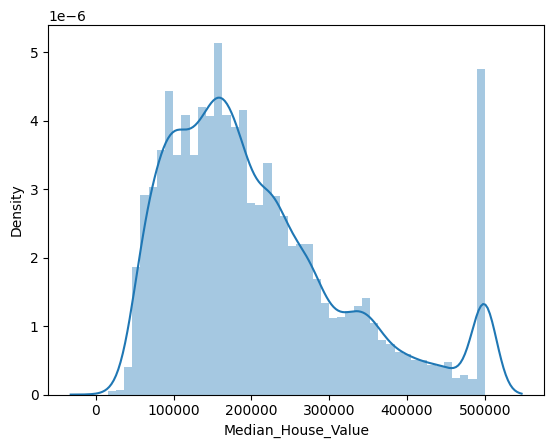

In [10]:
sns.distplot(hse_data['Median_House_Value']) #plotting a distribution plot, which is a form of histogram

In [11]:
q = hse_data['Median_House_Value'].quantile(0.98) #create one variable as q ---compute lline
hse_data_99th = hse_data[hse_data['Median_House_Value']<q] #process of selecting 98% quantile from data frame

In [12]:
hse_data_99th.describe(include="all") #describe all columns that shows mean, median, standard deviation, minimum, maximum, percentiles and etc

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Distance_to_coast
count,19675.000000,19675.000000,19675.000000,19675.000000,19675.000000,19675.000000,19675.000000,19675.000000
mean,192477.921017,3.676717,28.386277,2619.763659,539.653113,1440.812198,501.186023,41920.871979
std,97711.509613,1.570272,12.509113,2181.348207,422.294861,1143.648725,383.264636,49832.466538
min,14999.000000,0.499900,1.000000,2.000000,2.000000,3.000000,2.000000,120.676447
25%,116600.000000,2.526800,18.000000,1438.000000,297.000000,796.000000,282.000000,9808.067971
50%,173800.000000,3.450000,28.000000,2111.000000,436.000000,1179.000000,411.000000,21303.288700
75%,248200.000000,4.582600,37.000000,3120.000000,648.000000,1746.000000,606.000000,53197.491635
max,500000.000000,15.000100,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,333804.686400


<ipython-input-13-ec4218462d46>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hse_data_99th['Median_House_Value']) #plotting a distribution plot, which is a form of histogram


<Axes: xlabel='Median_House_Value', ylabel='Density'>

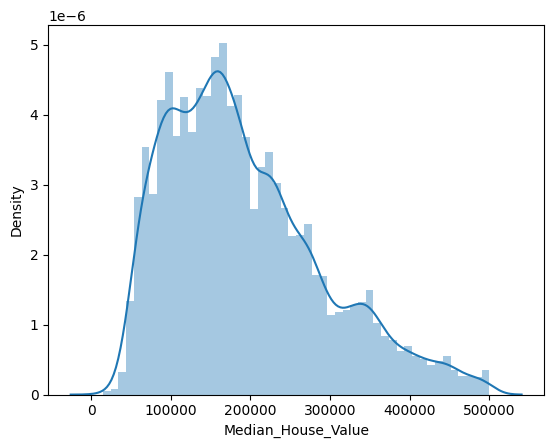

In [13]:
sns.distplot(hse_data_99th['Median_House_Value']) #plotting a distribution plot, which is a form of histogram

In [14]:
hse_data_99th.corr() #to calculate the relationship between each columns in the dataset

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Distance_to_coast
Median_House_Value,1.000000,0.642611,0.067948,0.143139,0.075607,0.011964,0.094894,-0.484246
Median_Income,0.642611,1.000000,-0.194784,0.224207,0.021570,0.042360,0.046068,-0.232459
Median_Age,0.067948,-0.194784,1.000000,-0.372009,-0.327517,-0.295124,-0.309438,-0.221541
Tot_Rooms,0.143139,0.224207,-0.372009,1.000000,0.933651,0.859590,0.921102,0.002970
Tot_Bedrooms,0.075607,0.021570,-0.327517,0.933651,1.000000,0.879502,0.979253,-0.024359
Population,0.011964,0.042360,-0.295124,0.859590,0.879502,1.000000,0.908997,-0.049256
Households,0.094894,0.046068,-0.309438,0.921102,0.979253,0.908997,1.000000,-0.065423
Distance_to_coast,-0.484246,-0.232459,-0.221541,0.002970,-0.024359,-0.049256,-0.065423,1.000000


<Axes: >

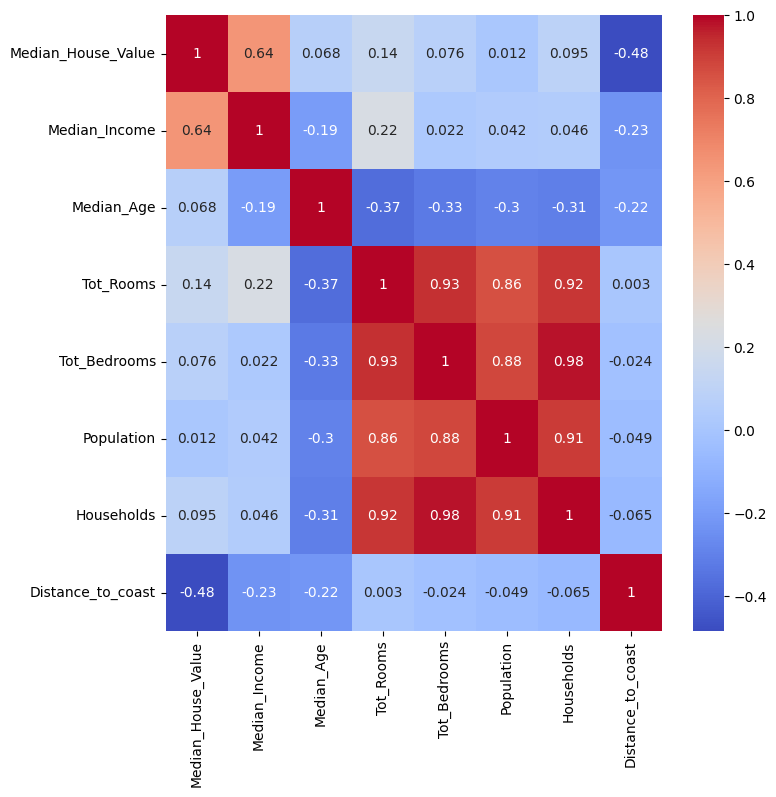

In [15]:
plt.figure(figsize=(8,8)) #change the width and height of the plot
sns.heatmap(hse_data_99th.corr(),annot=True,cmap='coolwarm') #Display Heatmap Correlation

In [16]:
hse_data_99th #display data frame

,Median_House_Value,Median_Income,Median_Age,Tot_Rooms,Tot_Bedrooms,Population,Households,Distance_to_coast
0,452600.0,8.3252,41,880,129,322,126,9263.040773
1,358500.0,8.3014,21,7099,1106,2401,1138,10225.733070
2,352100.0,7.2574,52,1467,190,496,177,8259.085109
3,341300.0,5.6431,52,1274,235,558,219,7768.086571
4,342200.0,3.8462,52,1627,280,565,259,7768.086571
...,...,...,...,...,...,...,...,...
20635,78100.0,1.5603,25,1665,374,845,330,162031.481100
20636,77100.0,2.5568,18,697,150,356,114,160445.433500
20637,92300.0,1.7000,17,2254,485,1007,433,153754.341200
20638,84700.0,1.8672,18,1860,409,741,349,152005.022200


In [32]:
data = hse_data_99th[['Median_Income','Tot_Rooms','Tot_Bedrooms','Households','Distance_to_coast','Median_House_Value']] #create data frame
data.head() #list the first 5 row of the data frame

,Median_Income,Tot_Rooms,Tot_Bedrooms,Households,Distance_to_coast,Median_House_Value
0,8.3252,880,129,126,9263.040773,452600.0
1,8.3014,7099,1106,1138,10225.733070,358500.0
2,7.2574,1467,190,177,8259.085109,352100.0
3,5.6431,1274,235,219,7768.086571,341300.0
4,3.8462,1627,280,259,7768.086571,342200.0


from matplotlib import pyplot as plt
_df_0['Median_Income'].plot(kind='hist', bins=20, title='Median_Income')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Tot_Rooms'].plot(kind='hist', bins=20, title='Tot_Rooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Tot_Bedrooms'].plot(kind='hist', bins=20, title='Tot_Bedrooms')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Households'].plot(kind='hist', bins=20, title='Households')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Median_Income', y='Tot_Rooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Tot_Rooms', y='Tot_Bedrooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Tot_Bedrooms', y='Households', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Households', y='Distance_to_coast', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Median_Income'].plot(kind='line', figsize=(8, 4), title='Median_Income')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Tot_Rooms'].plot(kind='line', figsize=(8, 4), title='Tot_Rooms')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Tot_Bedrooms'].plot(kind='line', figsize=(8, 4), title='Tot_Bedrooms')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Households'].plot(kind='line', figsize=(8, 4), title='Households')
plt.gca().spines[['top', 'right']].set_visible(False)

In [18]:
x = data.iloc[:,:-1] #shows all the rows and all the columns except the last column from the data frame
y = data.iloc[:,-1] #shows all the rows and the last column from the data frame

In [19]:
from sklearn.preprocessing import StandardScaler #machine learning library for Python
scaler= StandardScaler() #creates an instance of the StandardScaler class, which is a method for scaling the data
scaler.fit(x) #fits the scaler to the input data (x) so that it can compute the mean and standard deviation of each feature
x = scaler.transform(x) # applies the scaling transformation to the input data (x) so that each feature has a mean of 0 and a standard deviation of 1

In [20]:
from sklearn.model_selection import train_test_split #splits arrays or matrices into random subsets for train and test data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0) #splitting the dataset into training and testing sets using the "train_test_split" function from the Scikit-Learn library.

In [21]:
x_test #a variable that holds the testing set data for the input features of a learning machine

array([[-0.84039631, -0.18464448, -0.18464448, -0.34490368, -0.72472609],
       [-0.04885708, -0.37535707, -0.37535707, -0.36577751, -0.65670904],
       [ 0.87610196,  1.45750097,  1.45750097,  0.89187113, -0.13707756],
       ...,
       [ 0.66581452, -0.54635658, -0.54635658, -0.65540199, -0.66419604],
       [ 0.2004055 ,  0.37511532,  0.37511532,  0.13780379,  0.47648764],
       [-0.74939063, -0.67288705, -0.67288705, -0.69454044,  1.45054972]])

In [22]:
import statsmodels.api as sm #process of training
x_train = sm.add_constant(x_train) #add constant into the input features
reg_model = sm.OLS(y_train,x_train).fit() #to fit a linear regression model

In [23]:
x_test = sm.add_constant(x_test) #x_test is input test set
y_pred = reg_model.predict(x_test) #Predict the output by applying the model reg_model
predicted_test = pd.DataFrame({'Predicted Price':y_pred,'Actual Price':y_test}) #Create Data Frame
predicted_test.head() #list the first 5 rows of the data frame

,Predicted Price,Actual Price
2653,161030.388174,111400.0
18568,209648.901933,194500.0
15125,239270.122590,285400.0
19758,72250.505543,64700.0
1202,56502.983359,63000.0


In [24]:
reg_model.summary() #to display informations such as R-squared, adjusted R-squared, F-statistic and information on the residuals, including their distribution, mean, and standard deviation

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Median_House_Value   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     4645.
Date:                Wed, 24 Jan 2024   Prob (F-statistic):               0.00
Time:                        04:46:16   Log-Likelihood:            -1.9704e+05
No. Observations:               15740   AIC:                         3.941e+05
Df Residuals:                   15735   BIC:                         3.941e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.925e+05    527.146    365.260      0.000    1.92e+05    1.94e+05
x1          5.959e+04    639.555     93.173      0.000    5.83e+04    6.08e+04
x2         -1.077e+04    802.411    -13.425      0.000   -1.23e+04   -9199.397
x3         -1.077e+04    802.411    -13.425      0.000   -1.23e+04   -9199.397
x4           2.42e+04   1577.067     15.344      0.000    2.11e+04    2.73e+04
x5         -3.164e+04    571.826    -55.334      0.000   -3.28e+04   -3.05e+04
==============================================================================
Omnibus:                     3053.519   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6711.712
Skew:                           1.123   Prob(JB):                         0.00
Kurtosis:                       5.278   Cond. No.                     8.55e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.36e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

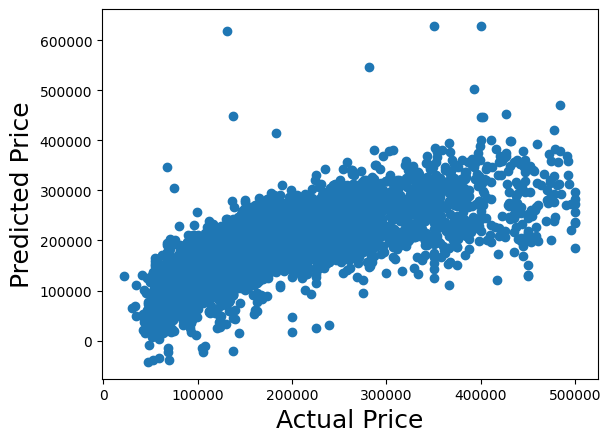

In [25]:
plt.scatter(y_test,y_pred) #create sctterpolt
plt.xlabel('Actual Price',size=18) #x-axis label as 'Actual Price'
plt.ylabel('Predicted Price',size=18) #y-axis label as 'Predicted Price'
plt.show() #display scatter plot

In [26]:
pred_actual = predicted_test[['Predicted Price','Actual Price']] #create new data frame
pred_actual.corr() #calculate the relationship between columns in the data frame

,Predicted Price,Actual Price
Predicted Price,1.000000,0.727008
Actual Price,0.727008,1.000000


In [27]:
predicted_test.head() #list the first 5 rows of the data frame

,Predicted Price,Actual Price
2653,161030.388174,111400.0
18568,209648.901933,194500.0
15125,239270.122590,285400.0
19758,72250.505543,64700.0
1202,56502.983359,63000.0


In [28]:
predicted_test['Residual']=predicted_test['Actual Price']-predicted_test['Predicted Price'] #Residual = Actual Price - Predicted Price
predicted_test.head(5) #List the first 5 rows of Data Frame

,Predicted Price,Actual Price,Residual
2653,161030.388174,111400.0,-49630.388174
18568,209648.901933,194500.0,-15148.901933
15125,239270.122590,285400.0,46129.877410
19758,72250.505543,64700.0,-7550.505543
1202,56502.983359,63000.0,6497.016641


In [29]:
predicted_test['%Diff']=np.absolute(predicted_test['Residual'] / predicted_test['Actual Price'])*100
predicted_test = np.around(predicted_test,2) # around is array round the decimal number
predicted_test.head()

,Predicted Price,Actual Price,Residual,%Diff
2653,161030.39,111400.0,-49630.39,44.55
18568,209648.90,194500.0,-15148.90,7.79
15125,239270.12,285400.0,46129.88,16.16
19758,72250.51,64700.0,-7550.51,11.67
1202,56502.98,63000.0,6497.02,10.31


In [30]:
predicted_test['%Diff']=np.absolute(predicted_test['Residual'] / predicted_test['Actual Price'])*100
predicted_test = np.around(predicted_test,2) # around is array round the decimal number
predicted_test.head()

,Predicted Price,Actual Price,Residual,%Diff
2653,161030.39,111400.0,-49630.39,44.55
18568,209648.90,194500.0,-15148.90,7.79
15125,239270.12,285400.0,46129.88,16.16
19758,72250.51,64700.0,-7550.51,11.67
1202,56502.98,63000.0,6497.02,10.31


In [31]:
import pickle #import pickle to handle file saving

filename = 'reg_model_save.sav' #write into file
pickle.dump(reg_model, open(filename,'wb')) #dump is used to save the model